<a href="https://colab.research.google.com/github/PotlachervuSrilatha/ML_Learning/blob/main/corizo_major_project_wine_quality_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing all required python library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from imblearn.over_sampling import SMOTE

import pickle
%matplotlib inline

#### set graph design as darkgrid

In [ ]:
sns.set_style('darkgrid')

#### import warnings to ignore warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Let's load Wine Quality data that data is in current folder.

In [ ]:
df = pd.read_excel("1788410-1767134-1729261-1613779-Red_wine__(1).xlsx")

#### Let's see top Wine Quality datapoint of dataframe df

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


#### Let's see shape of dataframe

In [ ]:
df.shape

(1599, 12)

#### Let's see dataframe all column with dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


#### Let's see all descriptive details about data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Let's check is any missing values exists

In [ ]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


#### Here we found some missing value let's remove that

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Fine there are no any missing values

#### Let's check duplicated datapoints

In [ ]:
df.duplicated().sum()

239

#### we found there are 239 duplicated datapoints let's remove and
#### just keep first datapoint.

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.duplicated().sum()

0

#### Now there are no deplicated datapoints, that's fine.

#### Let's see how much correlated our target column ( quality ) with other independent columns

In [ ]:
df.corr()[['quality']].T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.11931,-0.395122,0.227625,0.013832,-0.131059,-0.050499,-0.178297,-0.184108,0.132602,0.248713,0.480679,1.0


#### Noete
- Here we can easily see residual sugar and free sulfur dioxide very less correlated with quality.
- Due to that reason we should remover that columns.

#### Let's remove columns residual sugar and free sulfur dioxide.

In [ ]:
df.drop(['residual sugar', 'free sulfur dioxide'], axis = 1, inplace = True)

#### Let's see modified dataframe

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,6.0
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,5.0


### Let's Perform Some EDA...

#### Let's see percentage of each target classes

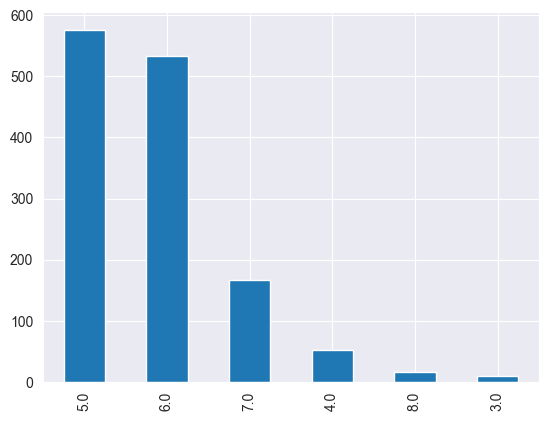

In [ ]:
df['quality'].value_counts().plot(kind = 'bar');

#### Let's see correlation between all the independent columns with our target column ( quality )

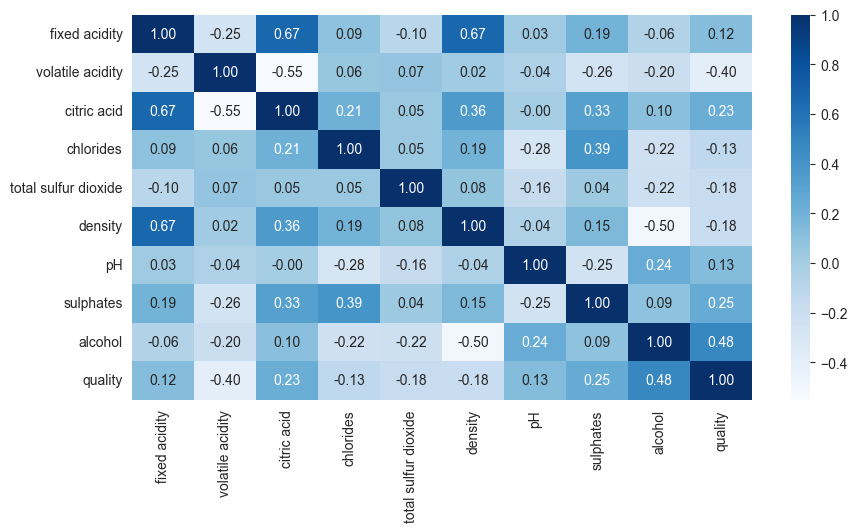

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap = 'Blues' );

#### Let's see relation between all pair of columns of our dataframe.

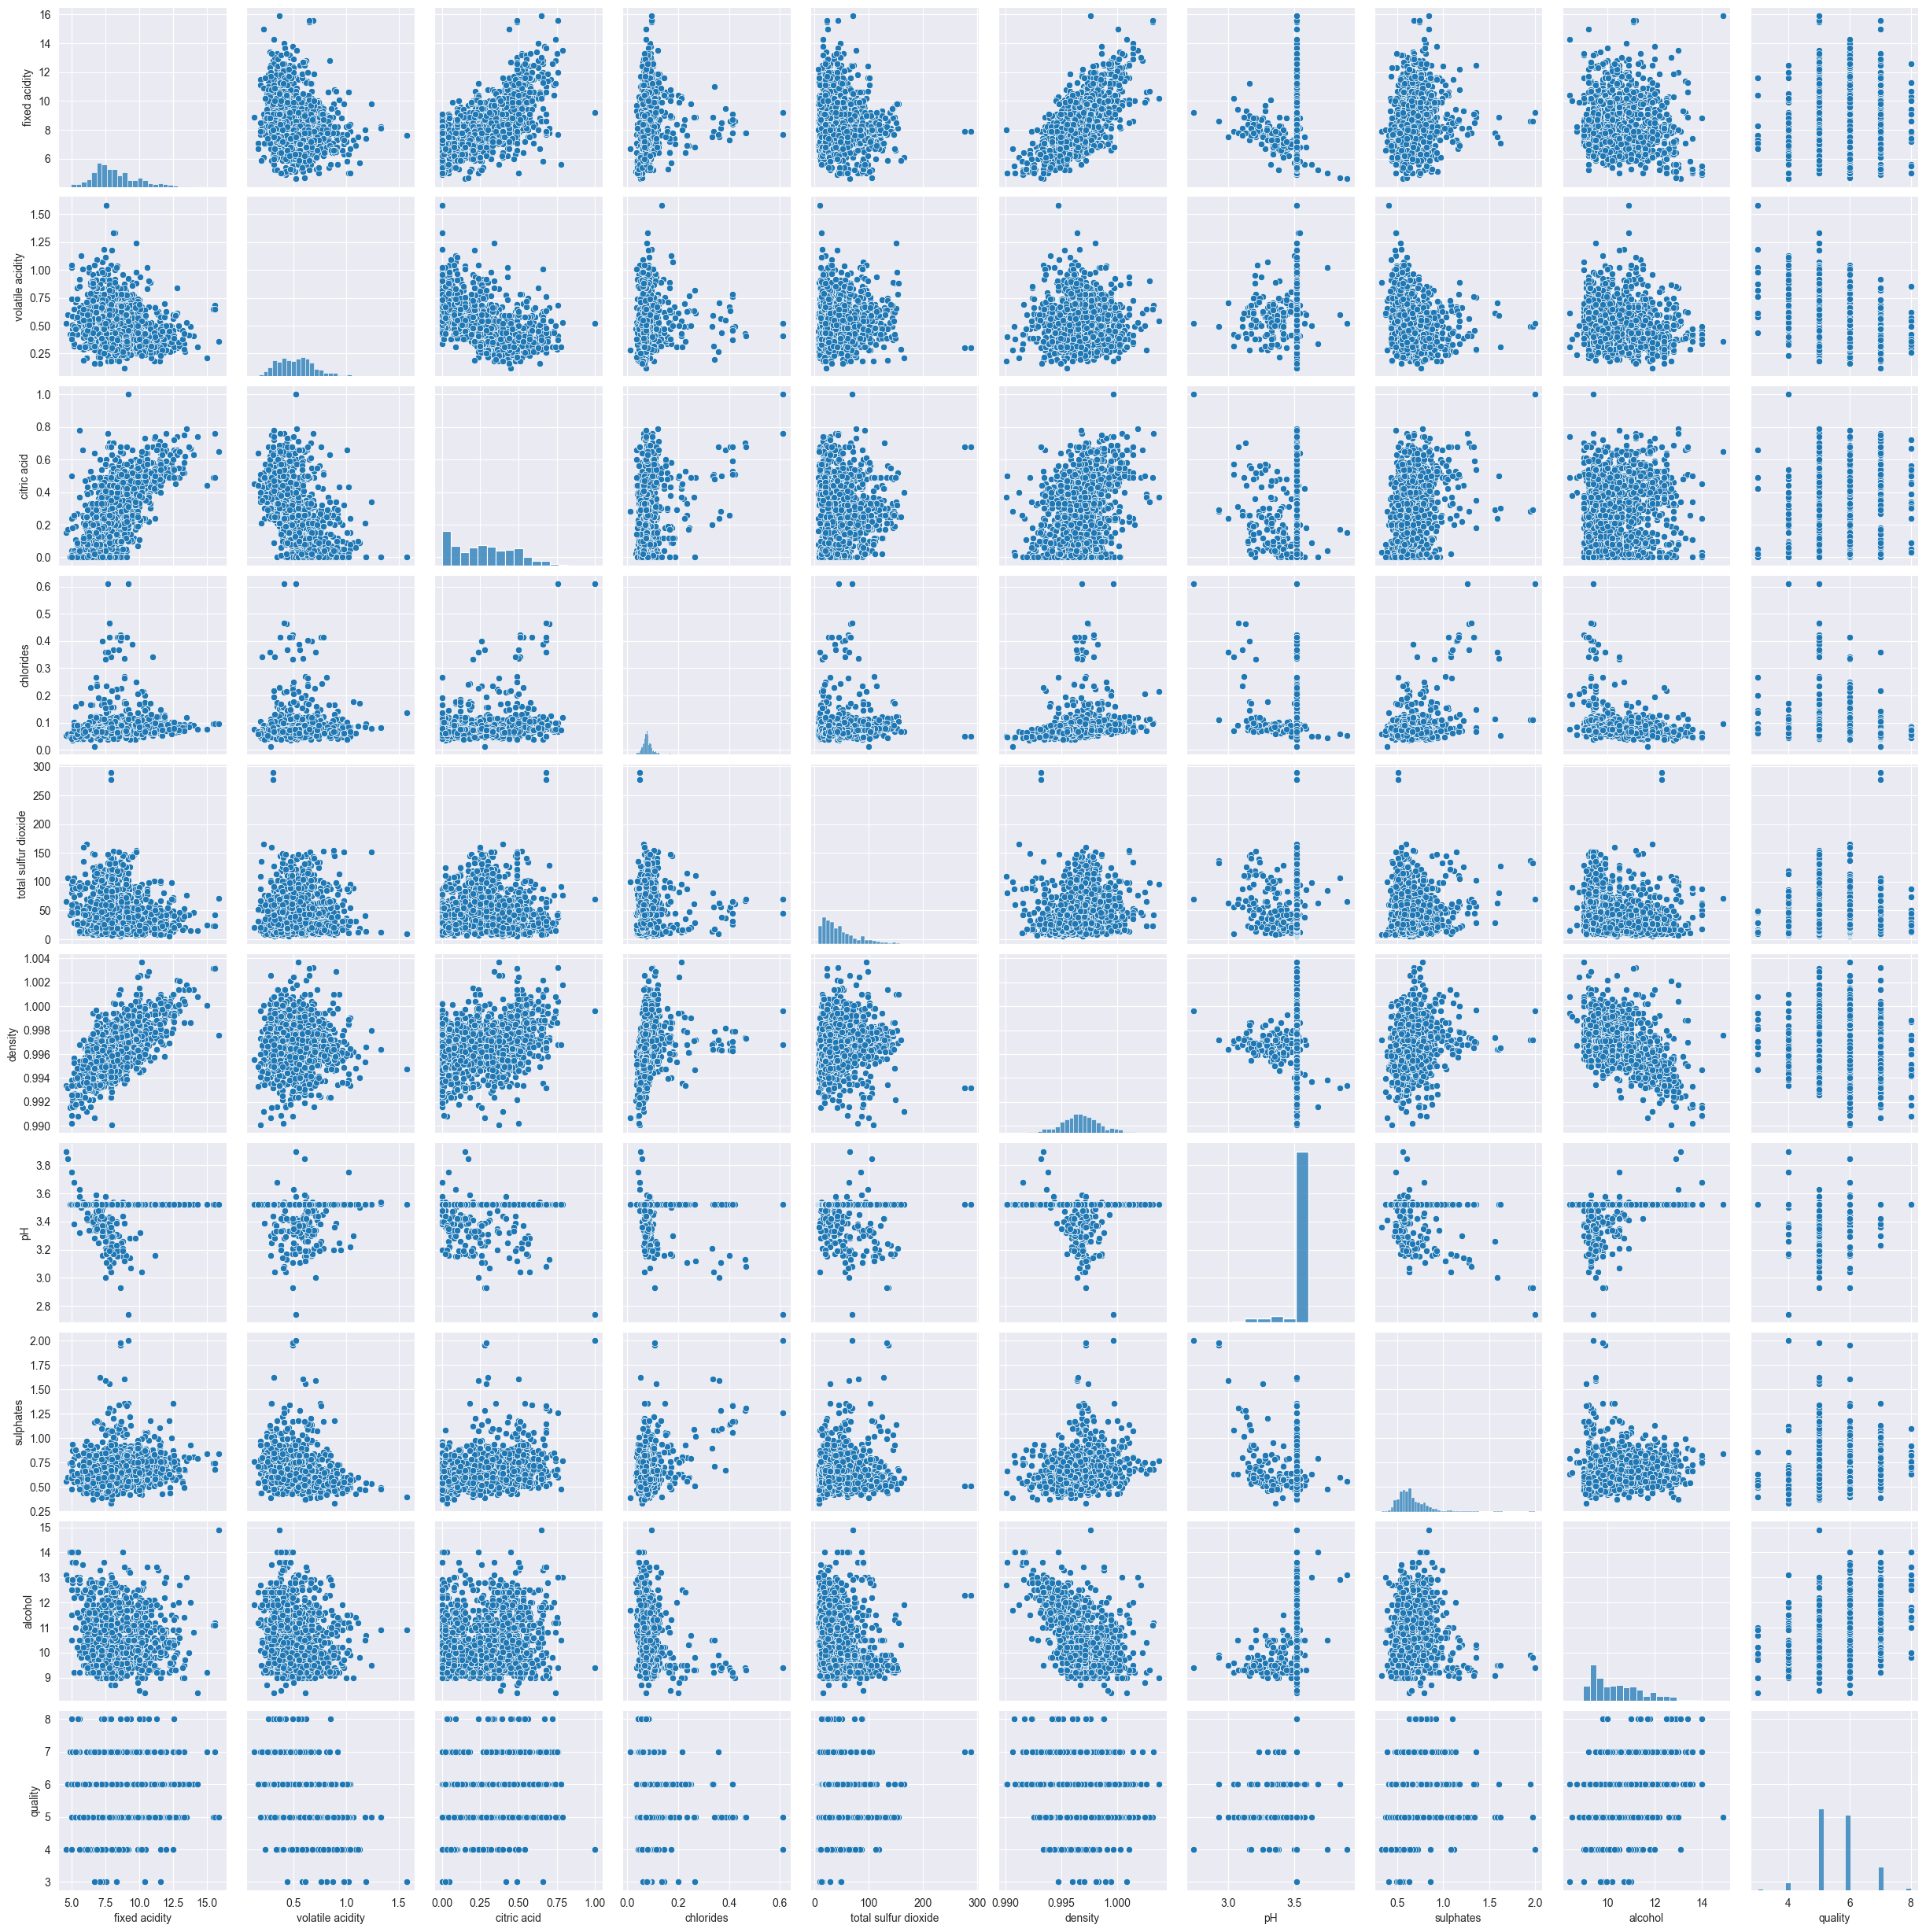

In [ ]:
sns.pairplot(df)

### Note -
#### As we have see our target column quality is totaly imbalance and also more spread.
#### Due to that reason i have to divide our target data in proper manner.
#### Let's do.

#### Let's devide target column quality on the basis of max value through IQR.
#### This Mean greater than upper range ( IQR ) wine quality would be consider as high_quality
#### other wise consider as low_quality .

In [ ]:
def return_min_max(val) :
    Q1 = np.percentile(val, 25)
    Q3 = np.percentile(val, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [ ]:
# Q1 = np.percentile(df['quality'], 0.25)
# Q3 = np.percentile(df['quality'], 0.75)
# IQR = Q3 - Q1
# lower_range = Q1 - 1.5 * IQR
# upper_range = Q3 + 1.5 * IQR
# lower_range, upper_range
return_min_max(df['quality'])

(3.5, 7.5)

#### we can see here upper_range is 7.5, means greater than or equal 7 value of wine quality
#### consider as high_quality.

In [ ]:
df['quality'] = df['quality'].apply(lambda x : "high_quality" if x >= 7 else "low_quality")

#### Let's see modified dataframe value_counts

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,low_quality
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,low_quality
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,low_quality
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,low_quality
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,low_quality


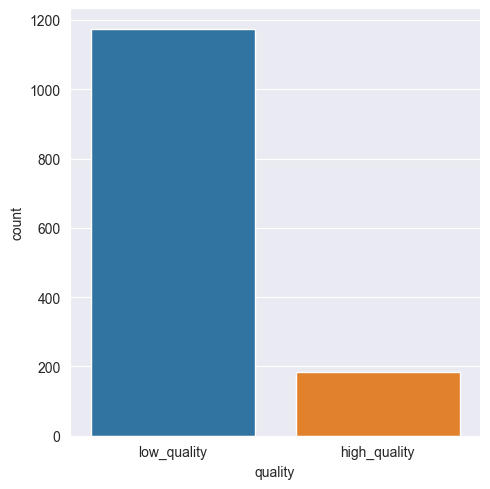

In [ ]:
sns.catplot( x = 'quality', kind = 'count', data = df);

#### Now you can see data is balanced.

In [ ]:
df['quality'].value_counts()

low_quality     1173
high_quality     184
Name: quality, dtype: int64

#### Let's see is any outlier present in each column, if present let's remover.
#### you will found two graph in each rows.
#### 1.) 1st indicate before removing outliers.
#### 2.) 2nd one represent after removing ourliers

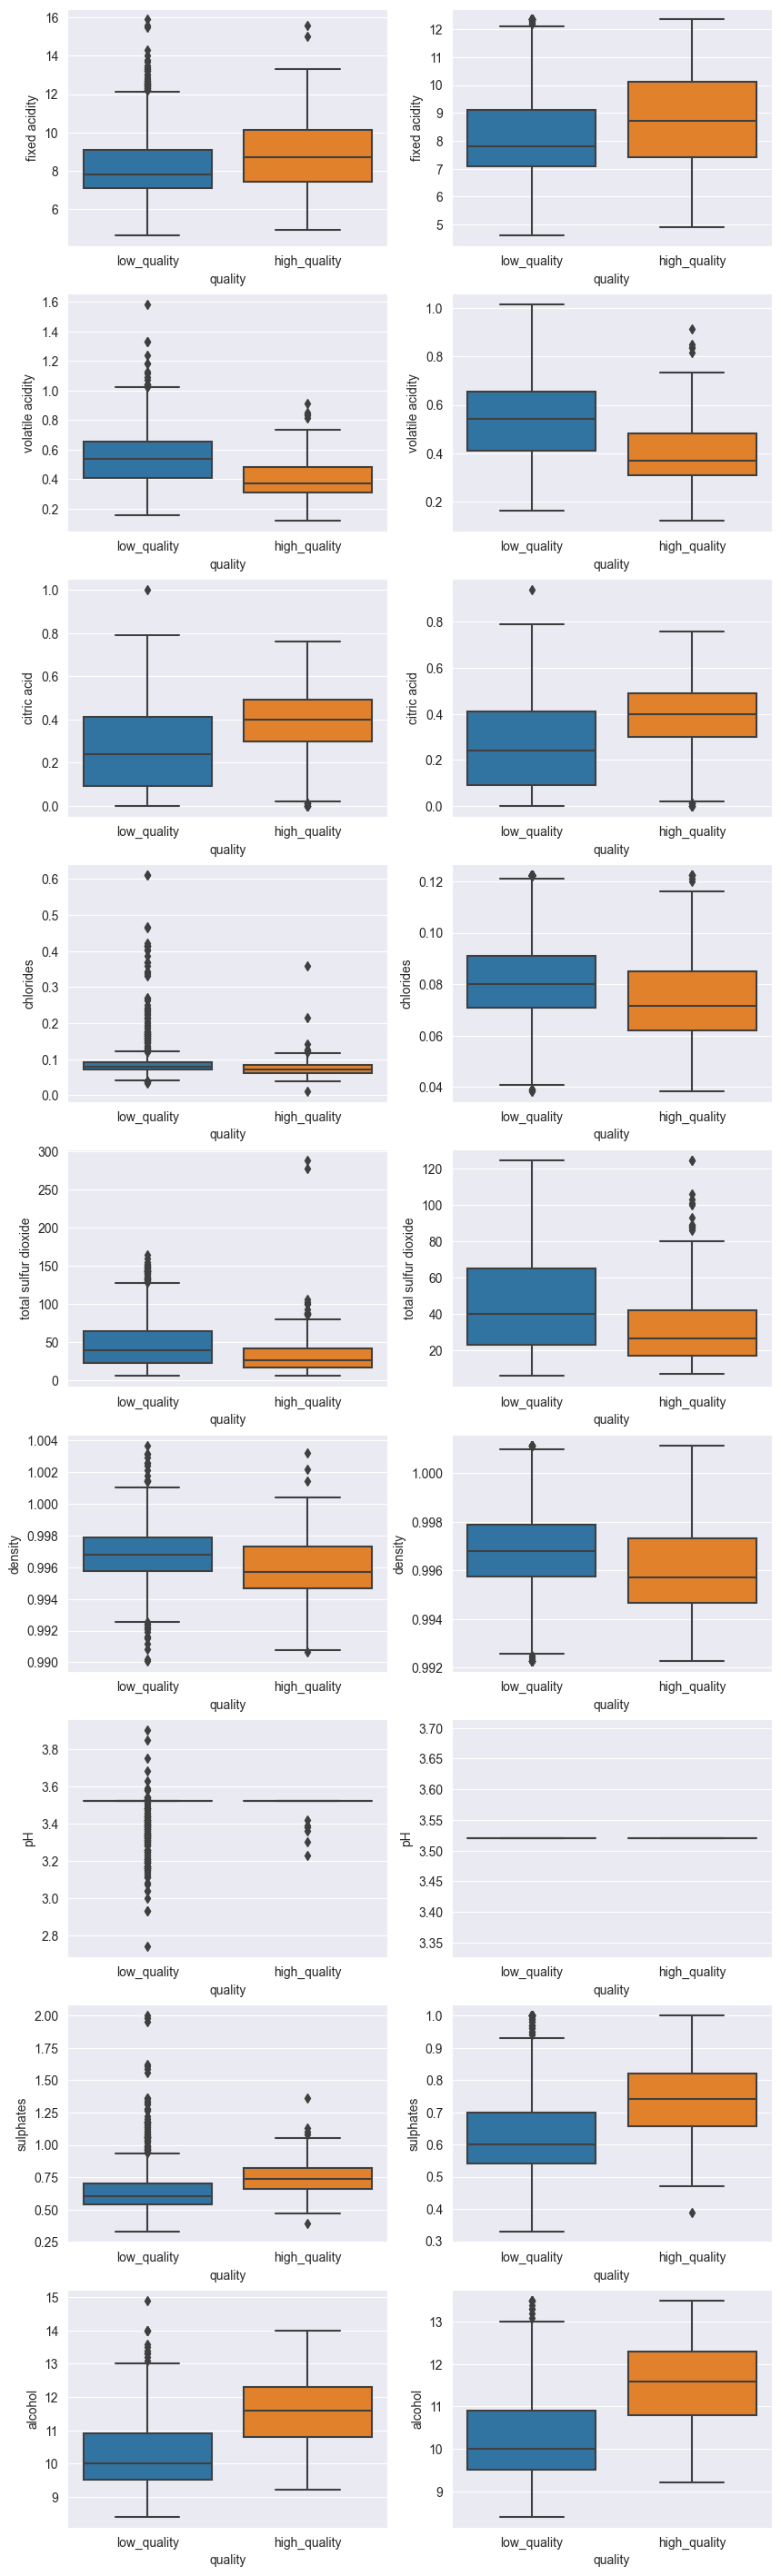

In [ ]:
fig, ax = plt.subplots(9, 2, figsize = (10, 9*4));
for i in range(9) :
    sns.boxplot(x = df['quality'] ,y = df[f'{df.columns[i]}'], ax = ax[i][0])
    min_iqr, max_iqr = return_min_max(df[f'{df.columns[i]}'])
    df[f'{df.columns[i]}'] = df[f'{df.columns[i]}'].apply(lambda x : min_iqr if x < min_iqr else max_iqr if x > max_iqr else x)
    sns.boxplot(x = df['quality'] ,y = df[f'{df.columns[i]}'], ax = ax[i][1])

## Model Building...

In [ ]:
df.sample()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1047,7.1,0.43,0.17,0.082,51.0,0.99634,3.52,0.64,10.4,low_quality


#### Let's split data into independent and target data

In [ ]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [ ]:
X.shape, y.shape

((1357, 9), (1357,))

#### let's split data into train and test

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1085, 9), (272, 9), (1085,), (272,))

#### first let's scale X_train and X_test and label encoding of target value y_train and y_test

In [ ]:
ss = StandardScaler()
le = LabelEncoder()

In [ ]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
X_train_ss

array([[ 9.88806329e-01, -1.17339541e+00,  1.49047737e+00, ...,
        -4.44089210e-16,  6.00896597e-01,  8.67111745e-01],
       [ 3.26513073e-01, -1.45095412e+00,  9.77172194e-01, ...,
        -4.44089210e-16, -6.37625890e-01,  7.74876365e-01],
       [ 5.07138506e-01, -9.51348448e-01,  6.17858575e-01, ...,
        -4.44089210e-16,  1.25658497e+00,  4.98170227e-01],
       ...,
       [-8.77656485e-01,  2.12955317e+00,  1.04553404e-01, ...,
        -4.44089210e-16, -7.83334417e-01,  5.90405606e-01],
       [ 2.66304595e-01, -2.85207557e-01,  1.55883921e-01, ...,
        -4.44089210e-16,  1.63771014e-01,  6.82640986e-01],
       [ 1.10922329e+00, -1.45095412e+00,  1.38781633e+00, ...,
        -4.44089210e-16, -8.56188681e-01,  1.88170092e+00]])

In [ ]:
y_train_le

array([1, 1, 0, ..., 1, 0, 1])

#### As we have seen through above graph that data is imbalance.
#### We gonna deal with this imbalance data we have to generate data using another algorith like SMOT.
#### Use SMOTE to oversample the minority class

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_ss, y_train_le)

#### Check the new class distribution

In [ ]:
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 936]
 [  1 936]]


### This is model dictionary that store all models object
#### Mean let's initilize models
#### 1.) LogisticRegression
#### 1.) RandomForestClassifier
#### 1.) SGDClassifier

In [ ]:
all_models_dic = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(random_state = 42),
    "SGDClassifier" : SGDClassifier(random_state = 0)
}
all_models_dic

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(random_state=42),
 'SGDClassifier': SGDClassifier(random_state=0)}

#### Let's train one by one model and show it's corresponding Accuracy.
#### And also store all model accuracy to accuracy_array to validate main model.

In [ ]:
accuracy_array = []

for model_name, model_obj in all_models_dic.items() :

    model = model_obj

    model.fit(X_resampled, y_resampled)

    y_pred_train =  model.predict(X_train_ss)
    y_pred_test = model.predict(X_test_ss)

    print(f"{model_name} - Training Accuracy")
    print()
    print(classification_report(y_train_le, y_pred_train))

    print(f"{model_name} - Testing Accuracy")
    print()
    print(classification_report(y_test_le, y_pred_test))

    accuracy_array.append({
        'model_name' : model_name,
        'train accuracy' : accuracy_score(y_train_le, y_pred_train),
        'test accuracy' : accuracy_score(y_test_le, y_pred_test),
        "train F1 - Score" : f1_score(y_train_le, y_pred_train),
        "test F1 - Score" : f1_score(y_test_le, y_pred_test)
    })

    print("="*60)
    print()

LogisticRegression - Training Accuracy

              precision    recall  f1-score   support

           0       0.39      0.81      0.53       149
           1       0.96      0.80      0.88       936

    accuracy                           0.80      1085
   macro avg       0.68      0.81      0.70      1085
weighted avg       0.89      0.80      0.83      1085

LogisticRegression - Testing Accuracy

              precision    recall  f1-score   support

           0       0.37      0.80      0.51        35
           1       0.96      0.80      0.88       237

    accuracy                           0.80       272
   macro avg       0.67      0.80      0.69       272
weighted avg       0.89      0.80      0.83       272


RandomForestClassifier - Training Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       936

    accuracy                           1.00      1085
   m

#### Let's see accuracy of indivisual model.

In [ ]:
pd.DataFrame(accuracy_array)

,model_name,train accuracy,test accuracy,train F1 - Score,test F1 - Score
0,LogisticRegression,0.802765,0.801471,0.875146,0.875576
1,RandomForestClassifier,1.000000,0.867647,1.000000,0.923077
2,SGDClassifier,0.757604,0.764706,0.841279,0.847619


#### According to above accuracy table.
#### We can say RandomForestClassifier model has highest Train and Test Accuracy.

### Thank you!